# Python Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import numpy as np

# Read the Dataset

In [2]:
#Kaggle veri çekme (veri çekmek için kaggle hesabınızdan apinizi indirip kaggle.json dosyanızı eklemeniz gerekmektedir.)
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
100% 158M/158M [00:08<00:00, 22.1MB/s]
100% 158M/158M [00:08<00:00, 19.3MB/s]


In [3]:
! unzip /content/covid19-image-dataset.zip

Archive:  /content/covid19-image-dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflatin

In [4]:
#Eğitim ve test verilerinin yolunu alma
train_path = "/content/Covid19-dataset/train"
test_path = "/content/Covid19-dataset/test"

In [5]:
#Veri sınıfları
image_classes = os.listdir("/content/Covid19-dataset/test")
image_classes

['Covid', 'Normal', 'Viral Pneumonia']

# Data Visualization
Veri Görselleştirme

In [6]:
def plot_images(image_classes):
    plt.figure(figsize = (14, 14))

    for i, category in enumerate(image_classes):
        image_path = train_path + "/" + category
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_path = image_path + "/" + first_image

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis("off")
    plt.show()

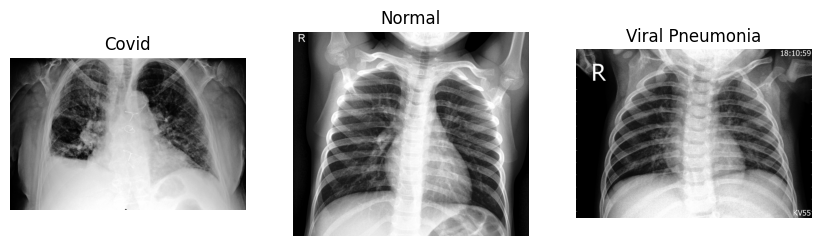

In [7]:
plot_images(image_classes)

# Data Preprocessing
Veri Ön İşleme

In [9]:
#piksel değerlerini 0 ile 1 arasında ölçeklendirir
image_generator = ImageDataGenerator(rescale = 1/255)

In [14]:
train_data = image_generator.flow_from_directory(train_path,
                                                target_size = (512, 512), # Giriş görüntülerini 512x512 piksel boyutuna yeniden boyutlandırır.
                                                batch_size = 16, # Her eğitim iterasyonunda kullanılacak görüntü sayısını belirtir.
                                                class_mode = "categorical") # Etiketlerin kategorik biçimde olmasını sağlar.

Found 251 images belonging to 3 classes.


In [15]:
test_data = image_generator.flow_from_directory(test_path,
                                                target_size = (512, 512),
                                                batch_size = 1,
                                                class_mode = "categorical")

Found 66 images belonging to 3 classes.


# CNN Model Building

In [17]:
model = Sequential() # Modeli oluşturur. "Sequential" modeli, katmanları sıralı bir şekilde eklemeyi sağlar.

In [18]:
# Convolutional Layer (Evrişim Katmanı)
model.add(Conv2D(filters = 16, # 16 filtre kullanarak 16 özellik haritası oluşturur.
                 kernel_size = 3, # Evrişim çekirdeğinin boyutu 3x3 piksel.
                 padding = "same", # Evrişim işlemi sonucunda boyut değişikliği olmaz.
                 activation = "relu", # ReLU aktivasyon fonksiyonunu kullanır.
                 input_shape = [512, 512, 3]) # Giriş verisinin boyutu 512x512 piksel ve 3 renk kanalı (RGB).
         )

# Pooling Layer (Havuzlama Katmanı)
model.add(MaxPooling2D(pool_size = (2,2))) # 2x2 boyutunda maksimum havuzlama işlemi uygular.

# Convolutional Layer (Evrişim Katmanı)
model.add(Conv2D(filters = 64, # 64 filtre kullanarak 64 özellik haritası oluşturur.
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",)
         )

# Pooling Layer (Havuzlama Katmanı)
model.add(MaxPooling2D())

# Convolutional Layer (Evrişim Katmanı)
model.add(Conv2D(filters = 128, # 128 filtre kullanarak 128 özellik haritası oluşturur.
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",)
         )

# Pooling Layer (Havuzlama Katmanı)
model.add(MaxPooling2D())


# Sınıflandırma

# Flatten Layer (Düzleştirme Katmanı)
model.add(Flatten()) # Evrişim ve havuzlama katmanlarından gelen çıktıları düzleştirir.

# Fully Connected Layer (Tam Bağlı Katman)
model.add(Dense(128, activation = "relu"))  # 128 nöron içeren tam bağlı katman, ReLU aktivasyon fonksiyonunu kullanır.
model.add(Dense(128, activation = "relu"))

# Output Layer
model.add(Dense(3, activation = "softmax")) # 3 sınıf için softmax aktivasyon fonksiyonunu kullanır.


# Model Summary
Model Özeti

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 128)       0

# Model Compiling & Fitting

In [20]:
model.compile(optimizer = "adam", # Modelin optimize edici olarak Adam optimizasyon algoritmasını kullanmasını belirtir.
             loss = "categorical_crossentropy", # Kayıp fonksiyonu olarak kategorik çapraz entropiyi kullanır. Bu, çoklu sınıflı sınıflandırma için yaygın bir seçimdir.
             metrics = ["accuracy"]) # Modelin performansını ölçmek için doğruluk metriğini kullanır.

In [21]:
model_history = model.fit(train_data,  # Eğitim veri setini kullanarak modeli eğitir.
                         epochs = 3,   #Her epoch, modelin tüm eğitim veri seti üzerinden bir kez geçmesini ifade eder.
                         validation_data = test_data ) # Test veri setini kullanarak modelin doğruluğunu ve kaybını değerlendirir. Eğitim sırasında, her epoch sonunda test veri seti üzerinde de performans ölçümleri yapılır.

Epoch 1/3
16/16 [==============================] - 23s 874ms/step - loss: 2.6759 - accuracy: 0.5020 - val_loss: 0.7752 - val_accuracy: 0.6364
Epoch 2/3
16/16 [==============================] - 8s 518ms/step - loss: 0.5243 - accuracy: 0.7689 - val_loss: 0.5576 - val_accuracy: 0.7273
Epoch 3/3
16/16 [==============================] - 9s 539ms/step - loss: 0.2322 - accuracy: 0.9363 - val_loss: 0.2197 - val_accuracy: 0.9242


# Model Visualization
Model Görselleştirme

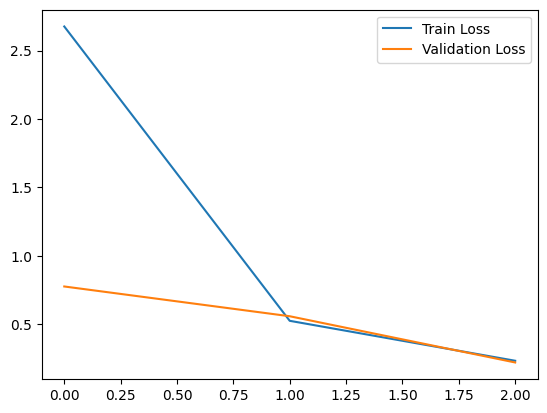

In [24]:
#Bu grafik, modelin eğitim ve doğrulama (validation) sırasında ne kadar iyi performans gösterdiğini ve aşırı uyum (overfitting) olup olmadığını belirlemeye yardımcı olur.
plt.plot(model_history.history["loss"], label = "Train Loss")
plt.plot(model_history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

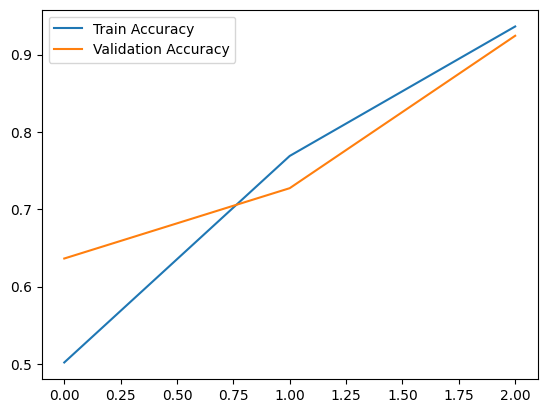

In [23]:
#Eğitim sırasında modelin eğitim veri seti üzerindeki doğruluğunun (accuracy) ve test (veya doğrulama) veri seti üzerindeki doğruluğunun (validation accuracy) nasıl değiştiğini görselleştirir.
plt.plot(model_history.history["accuracy"], label = "Train Accuracy")
plt.plot(model_history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

# Model Evaluation
Model Değerlendirmesi

In [25]:
model.evaluate(test_data)

66/66 [==============================] - 1s 16ms/step - loss: 0.2197 - accuracy: 0.9242


[0.21968147158622742, 0.9242424368858337]

In [26]:
model.evaluate(train_data)

16/16 [==============================] - 7s 404ms/step - loss: 0.0846 - accuracy: 0.9681


[0.08462993055582047, 0.9681274890899658]

# TFLite Convert

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Dönüştürülen modeli .tflite dosyasına yazma
with open('covidmodel.tflite', 'wb') as f:
    f.write(tflite_model)
    print("covidmodel.tflite oluşturuldu")

covidmodel.tflite oluşturuldu


In [30]:
labels = image_classes
deger=0;
# Etiket listesini labels.txt dosyasına yazma
with open("labels.txt", "w") as f:
    for label in labels:
        f.write(str(deger)+" "+label + "\n")
        deger=deger+1
    print("labels.txt oluşturuldu")

labels.txt oluşturuldu
